# using FastAI to create a digit classifier

in this we will discuss the roles of arrays and tensors and of broadcasting techniques. we will also cover stochastic gradient descent(sgd) which is a mechanism for learning by updating weights automatically.we will cover the choice of a loss function for our basic classification task and the role of minibatches. I will also the math in the nueral network and what it is doing.

#### Lets ask the question. " how are images represented in a computer?"

In [1]:
!pip install fastai

In [2]:
from fastai.data.external import untar_data, URLs
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('C:/Users/gjgut/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/valid')]

In [5]:
pip show fastai

Name: fastai
Version: 2.7.18
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: C:\Users\gjgut\miniconda3\Lib\site-packages
Requires: fastcore, fastdownload, fastprogress, matplotlib, packaging, pandas, pillow, pip, pyyaml, requests, scikit-learn, scipy, spacy, torch, torchvision
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
(path/'train').ls()

(#2) [Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/7')]

as we can see the folder has "3"s and "7"s which are the labels(or targets) in this dataset

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10091.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10093.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10097.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10099.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10116.png'),Path('C:/Users/gjgut/.fastai/data/mnist_sample/train/3/10

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In a computer everything is represented as a number. To view the number that make up this image, we have to convert it to a NumPy array or a PyTorch tensor.

In [9]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

the 4:10 indicates we requested the rows from index 4(inclusive) to 10(noninclusive), and the same for the columns. NumPy indexes from top to bottom and from left to right so this section is located near the top left corner of the image. 

In [10]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

example of what pytorch sensor looks like

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


now that we have seen what an image looks like to a computer lets return back to our goal
### creating a model that recognizes 3s and 7s

## baseline
a simple model that you are confident should perform reasonably well. it should be simple to implement adn easy to test, so that you can then test each of your imporoved ideas and make sure the yare always beter than your baseline. Without starting with a sensible baseline, it is difficult to know whether your super-fancy models are any good.

# step 1
our simple model is to get the average of pixel values for each of our two groups.

In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

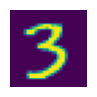

In [13]:
show_image(three_tensors[1]);

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [15]:
len(stacked_threes.shape)

3

In [16]:
stacked_threes.ndim

3

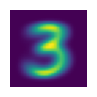

In [17]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

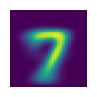

In [18]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

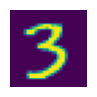

In [19]:
a_3 = stacked_threes[1]
show_image(a_3);

# note if you do not understand absolute value of differences and square of differences please read up on them as they are important